### **Bike Sharing**



### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **Business Problem Understanding**

**Context**

Sistem berbagi sepeda merupakan generasi baru dari penyewaan sepeda tradisional yang seluruh prosesnya, mulai dari keanggotaan, penyewaan, hingga pengembalian, telah menjadi otomatis. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari lokasi tertentu dan kembali lagi di lokasi lain. Saat ini, terdapat sekitar lebih dari 500 program berbagi sepeda di seluruh dunia yang terdiri dari lebih dari 500 ribu sepeda. Saat ini, minat yang besar terhadap sistem ini muncul karena perannya yang penting dalam masalah lalu lintas, lingkungan, dan kesehatan.

Selain aplikasi sistem berbagi sepeda yang menarik di dunia nyata, karakteristik data yang dihasilkan oleh sistem ini membuatnya menarik untuk diteliti. Tidak seperti layanan transportasi lain seperti bus atau kereta bawah tanah, durasi perjalanan, posisi keberangkatan, dan kedatangan dicatat secara eksplisit dalam sistem ini. Fitur ini mengubah sistem berbagi sepeda menjadi jaringan sensor virtual yang dapat digunakan untuk mendeteksi mobilitas di kota. Oleh karena itu, diharapkan bahwa peristiwa terpenting di kota dapat dideteksi dengan memantau data ini.

**Problem Statement**

Salah satu tantangan utama dalam layanan bike-sharing adalah memastikan bahwa sepeda tersedia secara optimal di berbagai lokasi untuk memenuhi permintaan pengguna. Pengelola layanan perlu memprediksi kebutuhan sepeda pada jam-jam tertentu dan kondisi cuaca tertentu agar pengguna dapat selalu mengakses sepeda saat dibutuhkan. Selain itu, faktor-faktor seperti cuaca, musim, dan waktu dalam sehari juga berpengaruh terhadap permintaan, dan manajemen perlu menyesuaikan alokasi sepeda dengan mempertimbangkan faktor-faktor tersebut.

Mengingat layanan bike-sharing memberikan kebebasan kepada pengguna untuk mengambil dan mengembalikan sepeda kapapun (tentu dengan kebijakan perusahaan), **penetapan jumlah sepeda yang tepat sangatlah penting.** Hal ini akan membantu mencegah kekurangan sepeda di kondisi tertentu yang padat pengguna serta mengurangi kemungkinan terlalu banyak sepeda yang tidak terpakai.

**Goals**

Berdasarkan permasalahan tersebut, layanan bike-sharing perlu memiliki 'tool' prediktif yang dapat membantu mereka memperkirakan jumlah permintaan sepeda pada hari, waktu, dan kondisi tertentu. Dengan menggunakan data seperti musim, jam, cuaca, dan variabel lain, alat prediktif ini dapat memperkirakan kebutuhan sepeda dengan lebih akurat. Hal ini akan menguntungkan pengguna dengan memastikan ketersediaan sepeda serta mengoptimalkan penggunaan infrastruktur bike-sharing, sehingga meningkatkan pengalaman pengguna secara keseluruhan.

Bagi penyedia layanan bike-sharing, 'prediction tool' yang dapat memberikan estimasi permintaan sepeda secara akurat tentu akan meningkatkan efisiensi operasional dan kepuasan pelanggan. Dengan semakin meningkatnya kepuasan pelanggan, akan ada peluang untuk meningkatkan jumlah sepeda sekaligus jumlah pengguna, yang pada akhirnya meningkatkan revenue perusahaan.

**Analytic Approach**

Jadi, yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu properti dengan yang lainnya.

Selanjutnya, kita akan membangun model regresi yang dapat membantu operator dalam memprediksi jumlah sepeda yang perlu disediakan di berbagai waktu. Model prediksi ini akan berguna untuk mengoptimalkan ketersediaan sepeda, sehingga dapat meningkatkan efisiensi operasional dan kepuasan pelanggan.

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan.

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

### **Data Understanding**

- Dataset merupakan data listing Bike-Sharing System di Ibu Kota antara tahun 2011 dan 2012.
- Setiap baris data merepresentasikan informasi terkait perhitungan harian dengan kondisi tertentu.

**Attributes Information**

| **Attribute**       | **Data Type** | **Description**   |
| --- | --- | --- |
| dteday          | Object    |Date           |
| hum             | Float     | Normalized humidity, values divided by 100 (max)                                         |
| weathersit      | Integer   | Weather situation: |
|||1 = Clear/Few clouds/Partly cloudy,|
|||2 = Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds/Mist, |
|||3 = Light Snow/Light Rain + Thunderstorm + Scattered clouds/Light Rain + Scattered clouds, |
|||4 = Heavy Rain + Ice Pallets + Thunderstorm + Mist/Snow + Fog |
| holiday         | Integer   | Holiday or not (1: holiday, 0: non-holiday)                                  |
| season          | Integer   | Season (1: winter, 2: spring, 3: summer, 4: fall)                                         |
| atemp           | Float     | Normalized feeling temperature in Celsius (derived via (t - tmin) / (tmax - tmin), where tmin = -16 and tmax = +50, hourly scale)                                 |
| temp            | Float     | Normalized temperature in Celsius (derived via (t - tmin) / (tmax - tmin), where tmin = -8 and tmax = +39, hourly scale) |
| hr              | Integer   | Hour (0 to 23)|
| casual          | Integer   | Count of casual users     |
| registered      | Integer   | Count of registered users |
| cnt             | Integer   | Count of total rental bikes including both casual and registered users                               |


<br>

In [1]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv('/content/sample_data/data_bike_sharing.csv')
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


#### **Exploratory Data Analysis**

**Distribution of Bike Sharing Count**

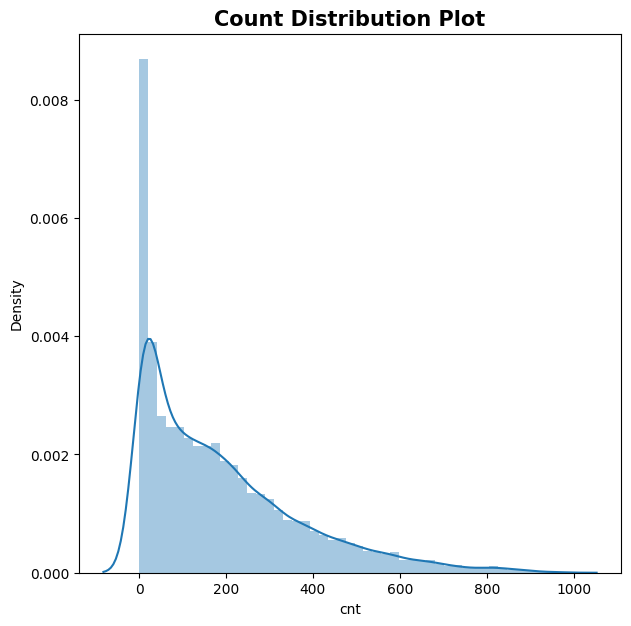

In [3]:
# Plot distribusi fitur 'count'
plt.figure(figsize=(7, 7))
sns.distplot(df['cnt'])
plt.title('Count Distribution Plot', size=15, weight='bold');

Berdasarkan plot distribusi jumlah sewa bike sharing di atas, terlihat bahwa terdapat 'right-skewed distribution'. Dengan kata lain, terdapat skewness positif pada fitur cnt (count).

**Types of property related to Count**

In [4]:
# Cek jumlah weathersit berdasarkan season dan tipenya
print(f"Jumlah sewa tiap season:\n{df['season'].value_counts()}")
print(f"\nJumlah sewa di weather tertentu:\n{df['weathersit'].value_counts()}")


Jumlah sewa tiap season:
season
3    3169
2    3074
1    3023
4    2899
Name: count, dtype: int64

Jumlah sewa di weather tertentu:
weathersit
1    8071
2    3119
3     972
4       3
Name: count, dtype: int64


Dapat dilihat bahwa jumlah sewa tiap musim cukup merata, sehingga sulit dibuktikan bahwa season memiliki pengaruh yang besar terhadap fitur cnt (count).

Untuk jumlah sewa di cuaca tertentu sangat memengaruhi jumlah sewa/fitur cnt (count). Dapat dilihat bahwa cuaca pada kategori 1 (Clear/Few clouds/Partly cloudy) memiliki jumlah sewa yang paling banyak. Disamping itu, cuaca pada kategori 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist/Snow + Fog) memiliki jumlah sewa yang paling sedikit. Hal ini dapat kita asumsikan bahwa cuaca sangat berpengaruh terhadap jumlah sewa/fitur cnt (count).

In [5]:
# Grouping tipe berdasarkan season
df.groupby(['season', 'weathersit'])['weathersit'].count()

season  weathersit
1       1             1922
        2              846
        3              252
        4                3
2       1             2000
        2              790
        3              284
3       1             2335
        2              642
        3              192
4       1             1814
        2              841
        3              244
Name: weathersit, dtype: int64

In [6]:
# Cek median count untuk tiap season
df_median_price = df.groupby(by=['season']).agg({'cnt':'median'}).reset_index()
df_median_price = df_median_price.set_index('season')
df_median_price = df_median_price.sort_values('cnt', ascending =False)
df_median_price.head()

,cnt
season,
3,198.0
2,165.5
4,155.0
1,76.0


weathersit,1,2,3,4
season,,,,
1,87.0,68.0,38.5,36.0
2,191.5,139.0,70.5,NaN
3,209.0,192.5,126.0,NaN
4,170.0,161.0,75.0,NaN


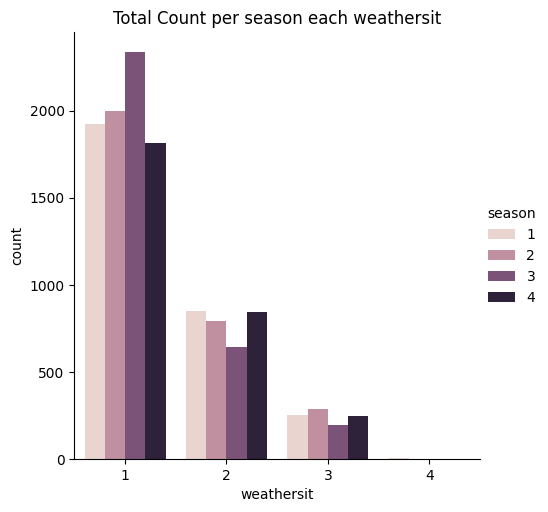

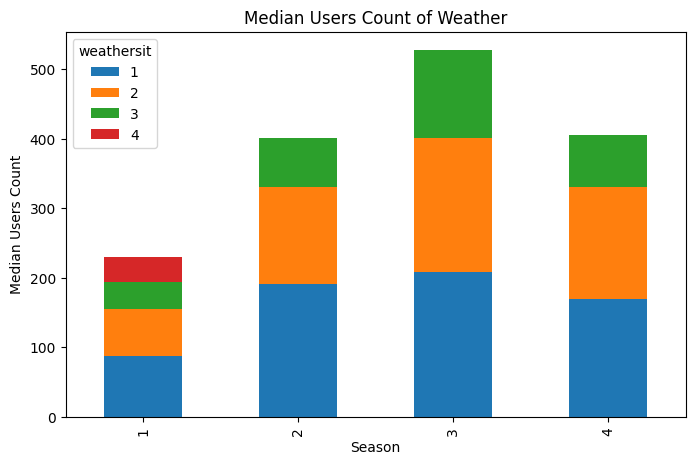

In [47]:
# Plot count median untuk tiap weathersit di setiap season
from IPython.display import display
df_display = df.copy()

neighbour_pivot = df_display.pivot_table(index='season', columns='weathersit', values='cnt', aggfunc='median')
display(neighbour_pivot)

# Persebaran weathersit berdasarkan season
sns.catplot(x='weathersit', kind='count', hue='season', data=df_display);
plt.title('Total Count per season each weathersit');

pivot_plot = neighbour_pivot.plot.bar(stacked=True, figsize=(8, 5))
pivot_plot.set_xlabel('Season')
pivot_plot.set_ylabel('Median Users Count')
pivot_plot.set_title('Median Users Count of Weather');

Musim panas/musim kategori 3 (Summer) menjadi musim dengan jumlah penyewa sepeda tertinggi, sedangkan musim dingin/musim kategori 1 (Winter) memiliki jumlah pengguna paling rendah.

Cuaca cerah (weathersit 1) memiliki korelasi positif dengan peningkatan jumlah penyewa sepeda di semua musim. Sedangkan kondisi cuaca ekstrem seperti hujan lebat atau badai (weathersit 4) secara drastis menurunkan jumlah pengguna sepeda.


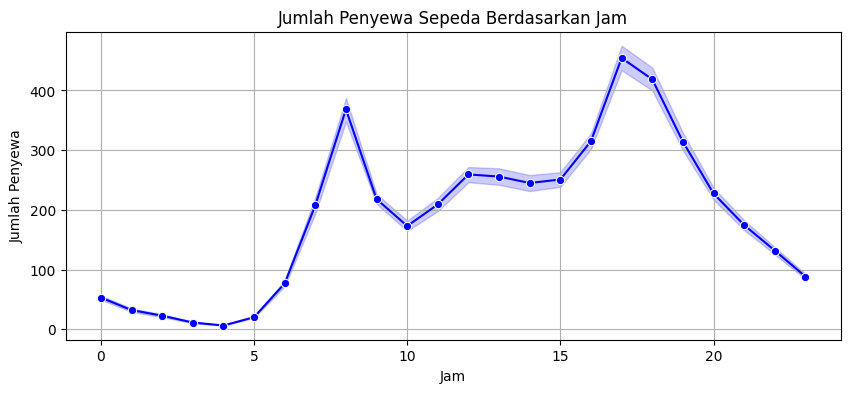

In [8]:
# Jumlah peminjaman sepeda per jam (hr)
plt.figure(figsize=(10, 4))
sns.lineplot(x='hr', y='cnt', data=df, marker='o', color="blue")
plt.title("Jumlah Penyewa Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewa")
plt.grid()
plt.show()

Berdasarkan grafik jumlah penyewa sepeda berdasarkan jam (hr), terlihat adanya pola tertentu di mana jumlah penyewa naik dan turun pada waktu-waktu tertentu dalam sehari.

**Peak Hours (Jam Sibuk)**

Terlihat lonjakan signifikan pada jam 05:00–08:00, yang mencerminkan waktu sibuk saat orang berangkat bekerja atau ke sekolah. Lonjakan kedua terjadi pada jam 15:00–17:00, yang menunjukkan waktu pulang kerja atau aktivitas lainnya. Ini menunjukkan bahwa pola penggunaan sepeda terkait erat dengan jadwal aktivitas rutin harian masyarakat.

**Off-Peak Hours (Jam Sepi)**

Jumlah penyewa rendah pada dini hari (jam 00:00–05:00) dan kembali menurun setelah jam sibuk sore hari. Hal ini wajar karena pada jam-jam tersebut sebagian besar aktivitas sudah selesai dan lebih sedikit orang yang menggunakan sepeda.



### **Data Preprocessing**

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.

Untuk proses data preprocessing dan feature engineering, kita akan menggunakan dataframe hasil duplikasi dari dataframe yang sebelumnya digunakan.

In [9]:
# Membuat duplikasi dataframe
df_model = df.copy()

In [10]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,dteday,object,0,0.0,731,"[2012-03-27, 2012-06-01]"
1,hum,float64,0,0.0,89,"[0.53, 0.46]"
2,weathersit,int64,0,0.0,4,"[1, 3]"
3,holiday,int64,0,0.0,2,"[1, 0]"
4,season,int64,0,0.0,4,"[3, 4]"
5,atemp,float64,0,0.0,65,"[0.3939, 0.0]"
6,temp,float64,0,0.0,50,"[0.84, 0.32]"
7,hr,int64,0,0.0,24,"[14, 1]"
8,casual,int64,0,0.0,305,"[235, 84]"
9,registered,int64,0,0.0,742,"[435, 207]"


Dari info dataset di atas, tidak terdapat data yang kosong pada beberapa fitur atau kolom.

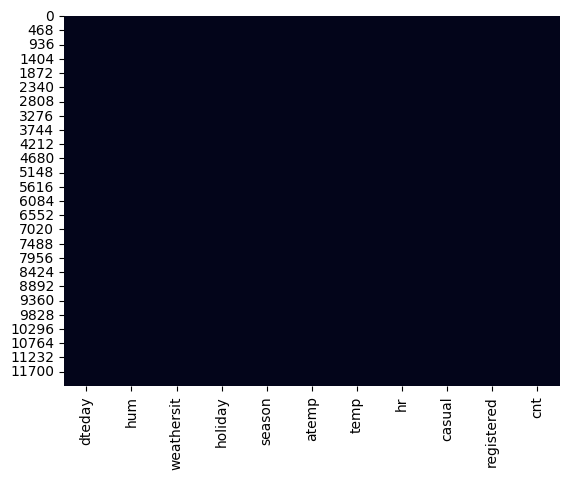

In [11]:
# Missing value heatmap
sns.heatmap(df_model.isnull(), cbar=False);

Tidak terdapat fitur yang memiliki missing value. Untuk fitur 'casual' dan 'registered', kita tidak perlu memikirkannya lebih lanjut karena nantinya kedua fitur ini sudah pasti akan kita drop karena kita akan fokus pada cnt (total sepeda yang disewa).

Kita juga dapat mengetahui bahwa tidak ada data yang duplikat pada dataset dengan melihat jumlah data unik dari fitur id, di mana jumlah data uniknya sama dengan jumlah keseluruhan data. Oleh karena itu, dataset ini tidak memiliki data yang duplikat. Untuk memastikannya, kita bisa cek dengan menggunakan function duplicated().

In [12]:
# Cek data duplikat
df_model.duplicated().sum()

0

**Drop Columns**

Tentu perlu ada pertimbangan sebelum melakukan drop pada kolom atau fitur. Sebagai pertimbangan, pada tahap awal ini kita bisa menggunakan domain knowledge untuk memutuskan kira-kira fitur mana saja yang dirasa tidak memiliki relevansi.
- Jika ditinjau berdasar domain knowledge, fitur 'dteday' tidak memiliki relevansi dan kepentingan untuk analisis prediktif.
- Fitur 'casual' dan 'registered' juga tidak diperlukan untuk membangun model prediktif jumlah sewa (cnt) karena nilai data pada fitur ini jika dijumlahkan adalah nilai cnt dan kita fokus pada prediksi cnt.

In [13]:
# Drop beberapa kolom yang tidak diperlukan
df_model.drop(['casual', 'registered'], axis=1, inplace=True)

In [14]:
# Cek info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   cnt         12165 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 855.5+ KB


Sekarang kolom 'casual', dan 'registered' sudah tidak ada.


**Missing Value**

In [15]:
# Cek nilai missing value
df_model.isnull().sum()

,0
dteday,0
hum,0
weathersit,0
holiday,0
season,0
atemp,0
temp,0
hr,0
cnt,0


In [16]:
# Cek deskriptif statistik fitur numerikal
num_features = [feature for feature in df_model.columns if ((df_model[feature].dtypes != 'object'))]
df_model[num_features].describe()

,hum,weathersit,holiday,season,atemp,temp,hr,cnt
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,189.271023
std,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,181.223903
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,1.000000
25%,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,40.000000
50%,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,142.000000
75%,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,282.000000
max,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,23.000000,970.000000


Untuk fitur 'dteday' kita akan melakukan encode menjadi data numerik 0-6 yaitu hari dalam seminggu (day of week)

In [17]:
df_model['dteday'] = pd.to_datetime(df_model['dteday'])
df_model['day_of_week'] = df_model['dteday'].dt.dayofweek

In [18]:
df_model.drop(columns=['dteday'], axis=1, inplace=True)
# Cek kembali dataset info
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hum          12165 non-null  float64
 1   weathersit   12165 non-null  int64  
 2   holiday      12165 non-null  int64  
 3   season       12165 non-null  int64  
 4   atemp        12165 non-null  float64
 5   temp         12165 non-null  float64
 6   hr           12165 non-null  int64  
 7   cnt          12165 non-null  int64  
 8   day_of_week  12165 non-null  int32  
dtypes: float64(3), int32(1), int64(5)
memory usage: 808.0 KB


**Data Correlation**

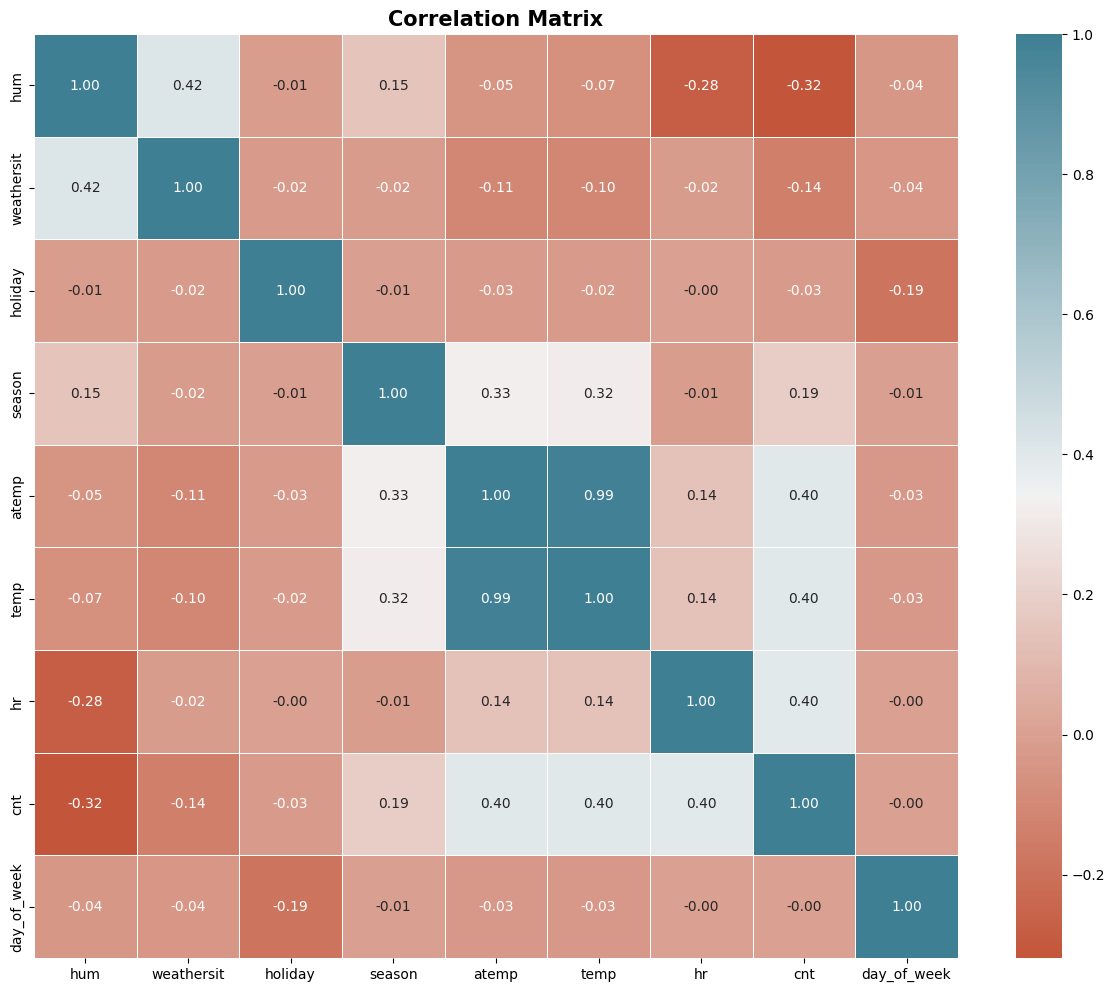

In [19]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_model.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

Correlation matrix menunjukkan bahwa tidak ada fitur yang memiliki korelasi yang kuat terhadap fitur cnt. Korelasi yang cukup kuat sekaligus paling tinggi dimiliki oleh fitur 'atemp', 'temp' dan 'hr', di mana korelasinya adalah korelasi positif. Ini berarti semakin ke tinggi temperatur, maka jumlah sewanya pun semakin banyak.

Selanjutnya, kita akan mengecek distribusi data dan outliers untuk tiap numerikal fitur. Jika distribusinya memiliki skewness yang tinggi, salah satu cara yang dapat kita lakukan untuk menguranginya adalah dengan melakukan rekayasa pada tiap fiturnya.

**Outliers Detection**

Banyaknya outliers pada data tentu akan memengaruhi hasil analisis dan pemodelan yang dilakukan. Ada beberapa hal yang harus dipertimbangkan sebelum memutuskan treatment yang sesuai dengan data, di antaranya adalah dengan mempertimbangkan sisi domain knowledge.

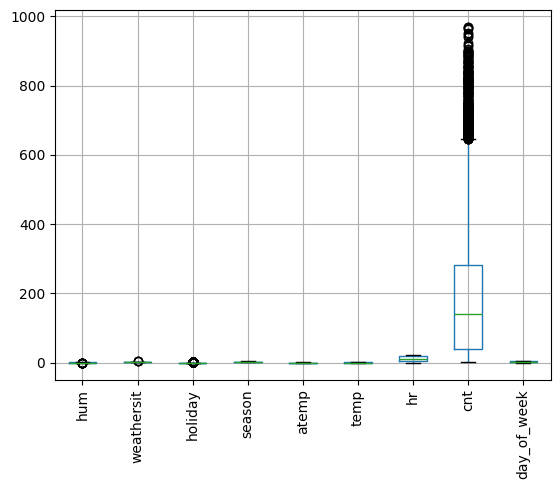

In [20]:
# Plot boxplot untuk mengecek outliers
df_model.boxplot(rot=90);

Hampir tidak ada outliers pada beberapa fitur, hanya cnt sebagai target yang memiliki rentang yang cukup jauh dibanding fitur lainnya. Dalam project ini, untuk membuat dataset yang lebih bersih dari outliers, kita akan melakukan beberapa rekayasa data pada fitur-fitur dengan mempertimbangkan kombinasi antara hasil dari metode IQR dan juga domain knowledge. Nantinya, model yang dihasilkan hanya terbatas dapat memprediksi listing baru yang nilai-nilainya pada rentang data berdasarkan 'clean dataset' ini saja. Di luar rentang data, hasil prediksi dari model akan menjadi bias.

Selanjutnya, kita dapat memulai feature engineering terhadap target count.

**Count**

In [21]:
# Cek deskriptif statistik kolom count
df_model['cnt'].describe()

,cnt
count,12165.000000
mean,189.271023
std,181.223903
min,1.000000
25%,40.000000
50%,142.000000
75%,282.000000
max,970.000000


Pada tahap ini pembersihan outlier akan dilakukan dengan metode IQR

In [22]:
Q1 = df_model['cnt'].quantile(0.25)
Q3 = df_model['cnt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_model = df_model[(df_model['cnt'] >= lower_bound) & (df_model['cnt'] <= upper_bound)]

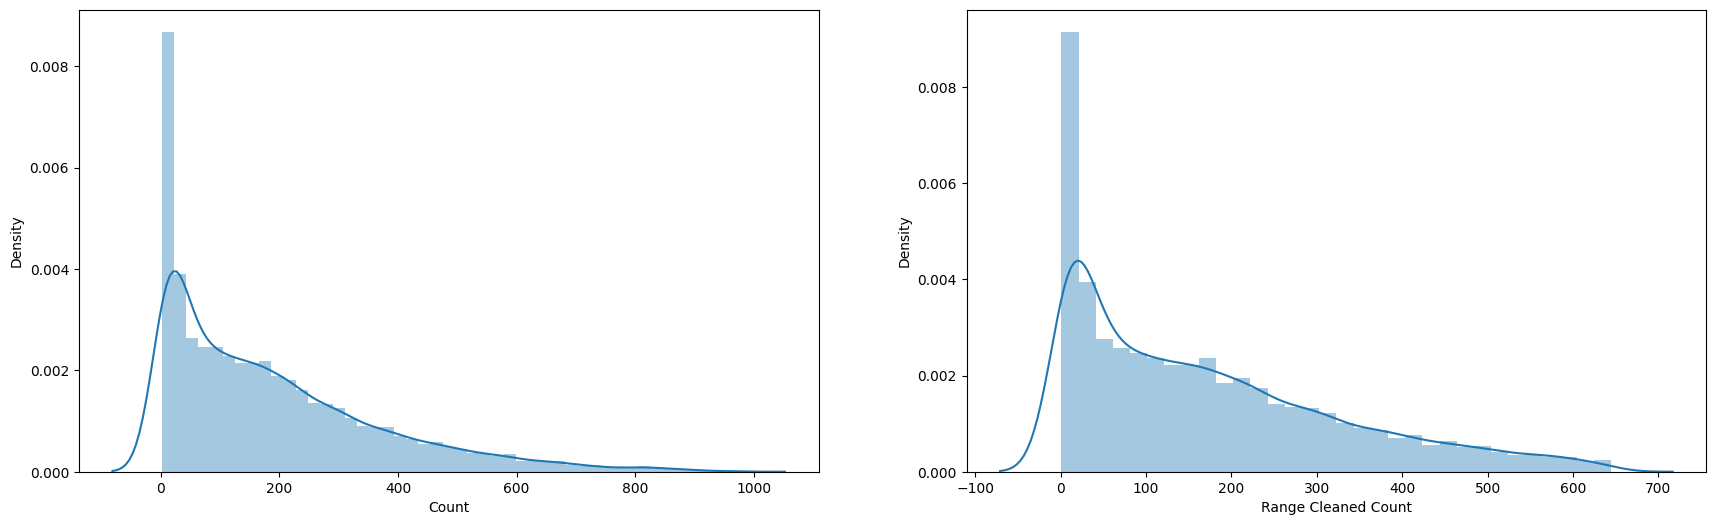

In [23]:
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['cnt'], ax=axes[0])
sns.distplot(df_model['cnt'], ax=axes[1])
axes[0].set_xlabel('Count')
axes[1].set_xlabel('Range Cleaned Count');

Berdasarkan grafik diatas, dapat diketahui bahwa skewness juga telah hilang bersamaan dengan pembersihan outlier

In [24]:
# Cek deskriptif statistik kolom 'count' setelah filtering
df_model['cnt'].describe()

,cnt
count,11827.000000
mean,173.211634
std,155.922696
min,1.000000
25%,37.000000
50%,136.000000
75%,267.000000
max,645.000000


**Clean Dataset**

In [25]:
# Cek dataset yang sudah bersih
df_model.head()

,hum,weathersit,holiday,season,atemp,temp,hr,cnt,day_of_week
0,0.62,1,0,4,0.3485,0.36,16,250,4
1,0.64,1,0,2,0.5152,0.54,4,18,6
2,0.53,1,0,2,0.6212,0.62,23,107,2
3,0.87,2,0,2,0.3485,0.36,8,145,5
5,0.72,1,0,4,0.4545,0.46,0,45,0


In [26]:
# Cek kembali info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11827 entries, 0 to 12164
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hum          11827 non-null  float64
 1   weathersit   11827 non-null  int64  
 2   holiday      11827 non-null  int64  
 3   season       11827 non-null  int64  
 4   atemp        11827 non-null  float64
 5   temp         11827 non-null  float64
 6   hr           11827 non-null  int64  
 7   cnt          11827 non-null  int64  
 8   day_of_week  11827 non-null  int32  
dtypes: float64(3), int32(1), int64(5)
memory usage: 877.8 KB


Pada akhirnya, tersisa 11827 baris data yang akan digunakan untuk pemodelan. Ini berarti hanya sekitar 300an data sudah tereliminasi sesuai dengan asumsi dan argumen yang disampaikan di proses-proses sebelumnya.

### **Modeling**

In [27]:
!pip install scikit-learn==1.2.2

In [28]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

# import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Data Splitting**

In [29]:
# Memisahkan data independen variabel dengan target
X = df_model.drop(['cnt'], axis=1)
y = df_model['cnt']

**Train and Test Splitting**

In [30]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=1)

**Choose a Benchmark Model**

In [31]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:

    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_root_mean_squared_error',
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_error',
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_percentage_error',
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-150.2173746  -148.68318265 -140.69932507 -145.04805708 -147.34261369] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-103.36045928 -102.0795544   -96.64776863  -98.3526305  -100.51535969] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-1.39024457 -1.40051612 -1.44230453 -1.3714683  -1.47585051] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-102.02804559  -97.5337129   -95.86091694  -94.61143771 -100.24584094] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-65.5697568  -63.70331321 -60.14439025 -60.20817131 -64.05287068] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRe

In [32]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-146.398111,3.316601,-100.191154,2.435217,-1.416077,0.037842
1,KNN Regressor,-98.055991,2.739662,-62.735700,2.182035,-0.781323,0.058311
2,DecisionTree Regressor,-86.396498,2.646222,-55.033619,1.276150,-0.538729,0.031747
3,RandomForest Regressor,-65.053232,1.796535,-42.345066,0.784262,-0.376671,0.009694
4,XGBoost Regressor,-62.854300,2.153237,-41.156117,0.727270,-0.358275,0.006688


Terdapat perbedaan cukup signifikan antara nilai RMSE dan MAE, di mana nilai RMSE lebih tinggi karena nilai residuals atau error-nya dikuadratkan terlebih dahulu sebelum dirata-ratakan. Hal ini menyebabkan RMSE akan memberikan 'weight' yang lebih tinggi untuk nilai error yang besar. Dengan kata lain, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.

- Berdasarkan nilai RMSE, RandomForest adalah model terbaik. Sedangkan jika berdasarkan nilai MAE dan MAPE, XGBoost memiliki nilai paling rendah.
- Selanjutnya, akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik, yaitu XGBoost dan RandomForest.

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost dan Random Forest

In [33]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,61.035082,41.900621,0.575464
RandomForest,63.906838,43.172744,0.452746


- Ketika dilakukan prediksi pada test set, performa XGBoost secara akumulatif sedikit lebih baik. Hal ini dapat dilihat dari nilai RMSE dan MAE yang sedikit lebih rendah dari RandomForest.


**Hyperparameter Tuning**

Karena model XGBoost memiliki performa yang sedikit lebih baik dari RandomForest, maka selanjutnya kita akan menggunakan model XGBoost ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

Untuk panduan tuning model XGBoost, dapat merujuk ke [Tuning XGBoost](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters).

In [34]:
max_depth = list(np.arange(1, 11))

learning_rate = list(np.arange(1, 100)/100)

n_estimators = list(np.arange(100, 201))

subsample = list(np.arange(2, 10)/10)

gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

colsample_bytree = list(np.arange(1, 10)/10)

reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth,
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [35]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb,
    param_distributions = hyperparam_space_xgb,
    n_iter = 100,
    cv = crossval,
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1
)

In [36]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           device=None,
                                                           early_stopping_rounds=None,
                                                           enable_categorical=False,
                                                           eval_metric=None,
                                                           feature_types=...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [37]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
81,0.264497,0.077644,0.014862,0.000084,0.9,0.464159,184,5,0.09,9,...,0.567660,1,-0.575597,-0.578509,-0.562744,-0.510475,-0.552294,-0.555924,0.024586,1
62,0.265449,0.008816,0.017999,0.000234,0.7,10.0,180,6,0.16,5,...,0.550259,3,-0.628917,-0.645184,-0.684821,-0.652457,-0.667306,-0.655737,0.019085,5
7,0.724256,0.122935,0.038935,0.020462,0.9,0.059948,119,8,0.05,5,...,0.659529,2,-0.589441,-0.584357,-0.623871,-0.586509,-0.585411,-0.593918,0.015073,3
75,0.289892,0.032345,0.021976,0.008518,0.9,3.593814,152,5,0.18,2,...,0.970997,4,-0.718357,-0.667995,-0.675692,-0.616075,-0.652451,-0.666114,0.033212,6
20,0.140125,0.002523,0.012422,0.001108,0.9,0.007743,143,4,0.38,6,...,0.504317,8,-0.759111,-0.705323,-0.730895,-0.682535,-0.729081,-0.721389,0.025847,8


In [38]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -61.76463046663152
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 0.46415888336127775, 'model__n_estimators': 184, 'model__max_depth': 5, 'model__learning_rate': 0.09, 'model__gamma': 9, 'model__colsample_bytree': 0.9}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [39]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,60.732663,42.358338,0.541345


**Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [40]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,61.035082,41.900621,0.575464


In [41]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,60.732663,42.358338,0.541345


Model mengalami peningkatan performa (nilai RMSE & MAPE berkurang) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit. Meski juga terdapat sedikit peningkatan pada MAE.
- RMSE, MAE & MAPE sebelum tuning: 61.03, 41.90, 0.575
- RMSE, MAE & MAPE setelah tuning: 60.73, 42.35, 0.541

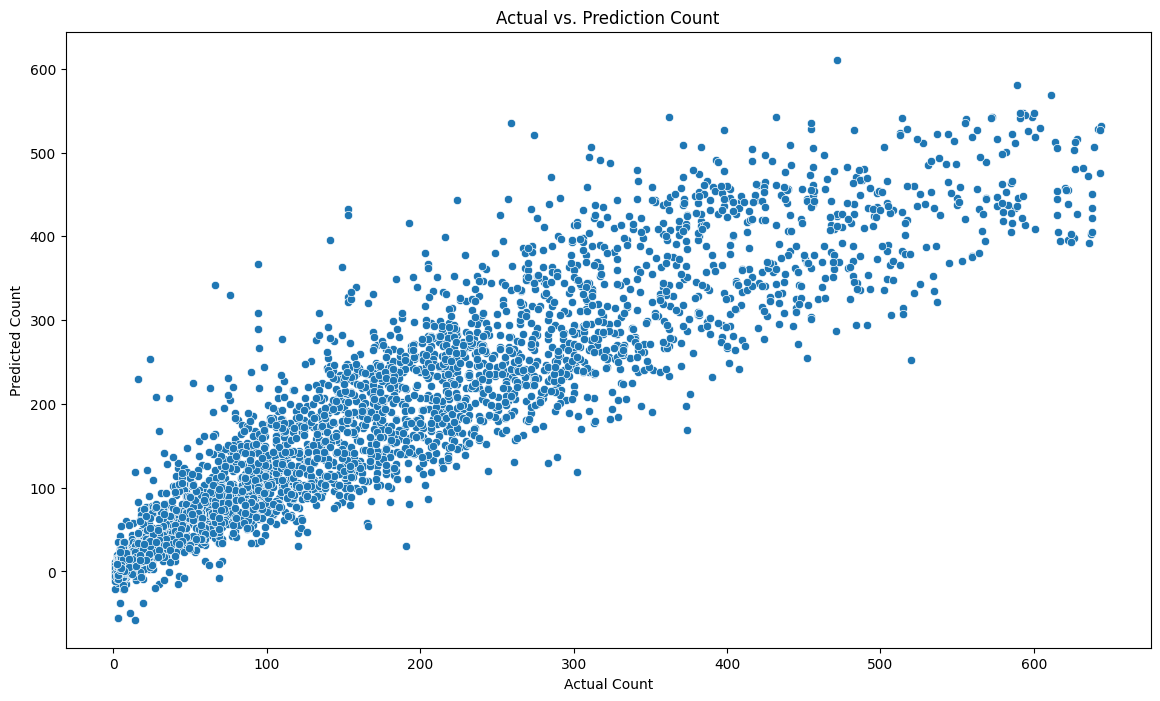

In [42]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Count',
                                               xlabel='Actual Count',
                                               ylabel='Predicted Count');

Adanya nilai-nilai error yang besar membuat perbedaan yang cukup signifikan antara nilai RMSE dan MAE. Hal ini dapat tergambarkan pula pada plot di atas, di mana terdapat jumlah aktual yang rendah tapi diprediksi cukup lebih tinggi (overestimation), dan juga sebaliknya (underestimation). Sayangnya, nilai MAPE yang didapat, yaitu sekitar 54% menjadikan model ini dikategorikan ke dalam 'weak forecasting' (Lewis, 1982).

*Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting*

**Feature Importances**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (cnt), kita dapat mengeceknya melalui function feature_importances_.

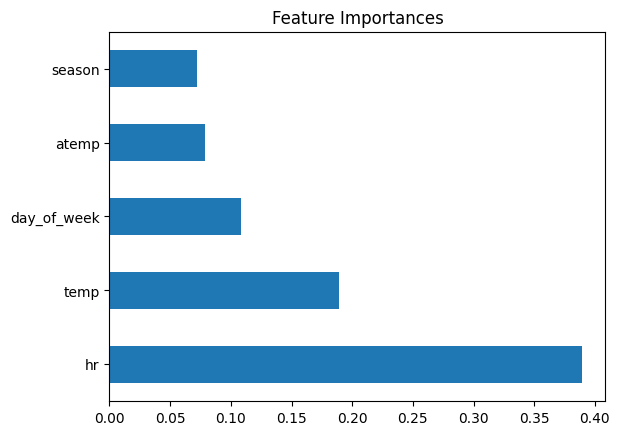

In [43]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, X_train.columns).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

### **Conclusion**

Berdasarkan analisis dan pemodelan pada data Bike Sharing, ditemukan bahwa fitur seperti suhu (temp dan atemp), jam (hr), dan cuaca (weathersit) memiliki pengaruh yang signifikan terhadap jumlah total penyewaan sepeda (cnt).

Model terbaik yang digunakan adalah XGBoost dengan performa setelah tuning mencapai RMSE 60,73, MAE 42,35, dan MAPE 54%.

Meskipun model ini dapat digunakan sebagai alat bantu prediksi untuk meningkatkan efisiensi alokasi sepeda, nilai MAPE yang tinggi menunjukkan bahwa model cenderung kurang akurat dalam beberapa kondisi tertentu. Hal ini disebabkan oleh keterbatasan fitur dalam dataset, seperti tidak adanya data lokasi stasiun sepeda atau faktor musiman lainnya. Oleh karena itu, disarankan untuk menambahkan fitur tambahan dan melakukan evaluasi lebih lanjut, seperti A/B testing, untuk mengukur efektivitas model dalam skenario operasional nyata serta mengurangi bias prediksi.

### **Recommendations**

    Lakukan A/B testing untuk menguji tingkat efektivitas model terhadap terpenuhinya permintaan pengguna sepeda jika dibandingkan dengan pendekatan manual tanpa model prediksi.

Lalu, hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:

1. Menyiapkan Fitur service_score:
  - Kumpulkan data pengalaman pengguna, seperti rasio ketersediaan sepeda atau waktu tunggu di setiap lokasi dan waktu tertentu.
  - Tentukan aturan penilaian:

    - 1 (positif): Jika rasio ketersediaan >80% atau waktu tunggu <5 menit.
    - 1 (negatif): Jika rasio ketersediaan <50% atau waktu tunggu >15 menit.

  - Hitung rata-rata skor untuk setiap lokasi atau waktu tertentu sebagai fitur baru (service_score).
2. Integrasi ke Model:

  - Gabungkan service_score dengan dataset asli sebagai variabel tambahan.
  - Pastikan fitur ini diproses bersamaan dengan atribut lain, seperti waktu, cuaca, dan lokasi, sebelum melatih model prediksi.
3. Uji Efektivitas dengan A/B Testing:

  - Grup A (baseline): Menggunakan model prediksi asli tanpa fitur service_score.
  - Grup B (model baru): Menggunakan model prediksi yang telah ditambahkan fitur service_score.
4. Pengumpulan dan Analisis Data:
  - Jalankan kedua model selama periode tertentu pada kelompok pengguna atau wilayah berbeda.
  - Kumpulkan metrik seperti jumlah permintaan terpenuhi, waktu tunggu rata-rata, atau tingkat kepuasan pengguna.
  - Bandingkan performa Grup A dan Grup B menggunakan uji statistik (misalnya, t-test) untuk menentukan apakah ada peningkatan signifikan pada Grup B.
5. Iterasi dan Penyempurnaan:
  - Jika hasil A/B testing menunjukkan peningkatan yang signifikan, lanjutkan dengan integrasi penuh fitur service_score.
  - Jika tidak, analisis ulang korelasi service_score terhadap target dan revisi metode penilaiannya untuk meningkatkan relevansi.

    Pendekatan dengan analisis sentimen seperti rasio ketersediaan sepeda atau waktu tunggu. Misalnya, lokasi dengan rasio ketersediaan sepeda >80% diberi skor 1 (positif), dan <50% diberi skor -1 (negatif). Skor ini kemudian dirata-ratakan untuk setiap lokasi atau waktu tertentu, menghasilkan fitur tambahan bernama service_score. Fitur ini dimasukkan ke dalam model prediksi untuk meningkatkan akurasi alokasi sepeda. Dalam A/B testing, model dengan service_score (Grup B) dibandingkan dengan model tanpa fitur ini (Grup A) untuk melihat pengaruhnya terhadap efisiensi layanan, sehingga akurasi prediksi dari model pun bisa lebih baik.

****

#### **Save Model**

In [51]:
# Save model
# import pickle

# estimator = Pipeline([ ('model', XGBRegressor())])
# estimator.fit(X_train, y_train)

# pickle.dump(estimator, open('Model_BikeSharing_XGB.sav', 'wb'))

In [52]:
# Load model
# filename = 'Model_BikeSharing_XGB.sav'
# loaded_model = pickle.load(open(filename, 'rb'))

In [53]:
# np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

61.03508233035128